# Abalone

- Import / Sanatize data from CSV : abalone.csv / glass.csv / ozone.csv 
- Utiliser les outils de seaborn & matplotlib pour realiser des graphiques sur les DF

### Libratries imports

In [1]:
import pandas as pd, numpy as np, seaborn as sns
import warnings 
import os
import sklearn.preprocessing as skp
from matplotlib import pyplot as plt

from datetime import datetime
warnings.filterwarnings(action="ignore")

%matplotlib inline

if int(str(sns.__version__).split('.')[1]) > 8 : 
    plt.style.use('seaborn-v0_8-darkgrid')
else:
    plt.style.use('seaborn-darkgrid')
    
sns.set(font_scale=3)

### Import du fichier abalone

In [2]:
os.chdir("C:/Users/etien/Documents/CCI/_HUB/cours/2024-2025/big_data/_git/donnees")


abalone = pd.read_csv('abalone.csv',
                           sep=',',
                           na_values='mq',
                           dtype={'numer_sta':str,'date':str},
                          )
abalone.drop(columns=['Unnamed: 0'])

,Sex,Longueur,Diametre,Hauteur,Poids.Entier,Poids.Decortique,Poids.Visceres,Poids.Coquille,Anneaux
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# Centre réduit 

In [3]:
quantitatives = ['Longueur', 'Diametre', 'Hauteur', 'Poids.Entier', 'Poids.Decortique', 'Poids.Visceres', 'Poids.Coquille', 'Anneaux']

def centre_reduit(df, columns_name):
    ndf = df.copy()
    modelStd = skp.StandardScaler()
    modelStd.fit(ndf[columns_name])
    ndf[columns_name] = modelStd.transform(ndf[columns_name])
    return ndf, modelStd

# Centre réduit par column 

In [4]:
def centre_reduit_par_column(df, columns_name):
    ndf = df.copy()
    for i in columns_name: 
        modelStd_m = skp.StandardScaler()
        ndf[i] = modelStd_m.fit_transform(ndf[i].values.reshape(-1,1))
    return ndf

# Opération inverse centre réduit

In [5]:

def reverse_center_reduced(df, columns_name, model):
    ndf = df.copy()
    ndf[columns_name] = model.inverse_transform(ndf[columns_name])
    return ndf


# Exemple Centre réduit 

In [6]:
abalone_centre_reduit, modelStd = centre_reduit(abalone, quantitatives)
abalone_centre_reduit.head(15)

,Unnamed: 0,Sex,Longueur,Diametre,Hauteur,Poids.Entier,Poids.Decortique,Poids.Visceres,Poids.Coquille,Anneaux
0,1,M,-1.449007,-1.439892,-1.184252,-1.230344,-1.170967,-1.205327,-1.213054,-0.909797
1,2,F,0.049892,0.122015,-0.108247,-0.309601,-0.463610,-0.356844,-0.207277,-0.289298
2,3,M,-0.699558,-0.432210,-0.347360,-0.637928,-0.648334,-0.607739,-0.602404,0.020951
3,4,I,-1.615552,-1.540661,-1.423364,-1.272150,-1.216022,-1.287438,-1.320816,-0.909797
4,5,I,-0.824466,-1.087204,-1.064696,-0.973393,-0.983991,-0.940746,-0.853848,-0.599548
5,6,F,0.049892,0.071631,0.250421,-0.104652,-0.551467,-0.356844,0.654817,3.123443
6,7,F,0.174800,0.172399,-0.347360,-0.124025,-0.294656,-0.283856,0.151929,1.882446
7,8,M,-0.408105,-0.381826,-0.347360,-0.651184,-0.643829,-0.621424,-0.530563,-0.289298
8,9,F,0.216436,0.323551,0.250421,0.133946,-0.202294,-0.270171,0.582976,2.813193
9,10,F,0.008255,-0.281058,0.011309,-0.453372,-0.745201,-0.302103,-0.207277,1.261948


# Exemple Reverse centre réduit

In [7]:
abalone_centre_reduit, modelStd = centre_reduit(abalone, quantitatives)
reversed_abalone = reverse_center_reduced(abalone_centre_reduit, quantitatives, modelStd)
reversed_abalone.head(15)

,Unnamed: 0,Sex,Longueur,Diametre,Hauteur,Poids.Entier,Poids.Decortique,Poids.Visceres,Poids.Coquille,Anneaux
0,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0
1,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0
2,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0
3,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0
4,5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8.0
5,6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20.0
6,7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16.0
7,8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9.0
8,9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19.0
9,10,F,0.525,0.380,0.140,0.6065,0.1940,0.1475,0.210,14.0


In [8]:
ab = centre_reduit_par_column(abalone, quantitatives)
ab.head(15)

,Unnamed: 0,Sex,Longueur,Diametre,Hauteur,Poids.Entier,Poids.Decortique,Poids.Visceres,Poids.Coquille,Anneaux
0,1,M,-1.449007,-1.439892,-1.184252,-1.230344,-1.170967,-1.205327,-1.213054,-0.909797
1,2,F,0.049892,0.122015,-0.108247,-0.309601,-0.463610,-0.356844,-0.207277,-0.289298
2,3,M,-0.699558,-0.432210,-0.347360,-0.637928,-0.648334,-0.607739,-0.602404,0.020951
3,4,I,-1.615552,-1.540661,-1.423364,-1.272150,-1.216022,-1.287438,-1.320816,-0.909797
4,5,I,-0.824466,-1.087204,-1.064696,-0.973393,-0.983991,-0.940746,-0.853848,-0.599548
5,6,F,0.049892,0.071631,0.250421,-0.104652,-0.551467,-0.356844,0.654817,3.123443
6,7,F,0.174800,0.172399,-0.347360,-0.124025,-0.294656,-0.283856,0.151929,1.882446
7,8,M,-0.408105,-0.381826,-0.347360,-0.651184,-0.643829,-0.621424,-0.530563,-0.289298
8,9,F,0.216436,0.323551,0.250421,0.133946,-0.202294,-0.270171,0.582976,2.813193
9,10,F,0.008255,-0.281058,0.011309,-0.453372,-0.745201,-0.302103,-0.207277,1.261948


In [9]:
(abalone_centre_reduit.Longueur - ab.Longueur).describe()

count    4176.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Longueur, dtype: float64

In [10]:
(abalone_centre_reduit.Anneaux - ab.Anneaux).describe()

count    4176.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Anneaux, dtype: float64

In [11]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4176 non-null   int64  
 1   Sex               4176 non-null   object 
 2   Longueur          4176 non-null   float64
 3   Diametre          4176 non-null   float64
 4   Hauteur           4176 non-null   float64
 5   Poids.Entier      4176 non-null   float64
 6   Poids.Decortique  4176 non-null   float64
 7   Poids.Visceres    4176 non-null   float64
 8   Poids.Coquille    4176 non-null   float64
 9   Anneaux           4176 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 326.4+ KB


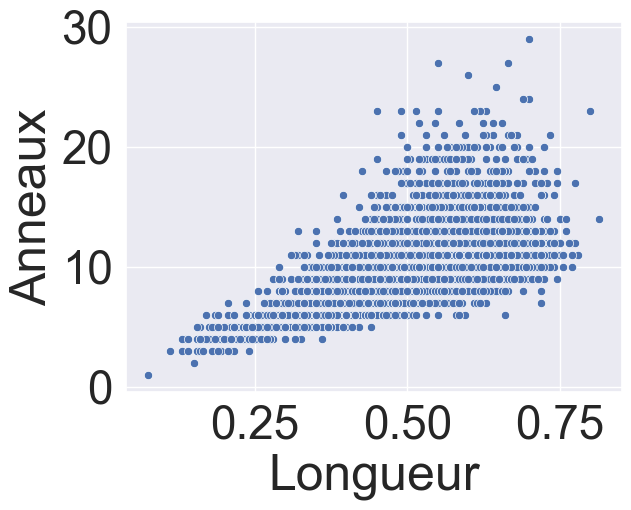

In [12]:
sns.scatterplot(x='Longueur', y='Anneaux', data=abalone)
plt.show()

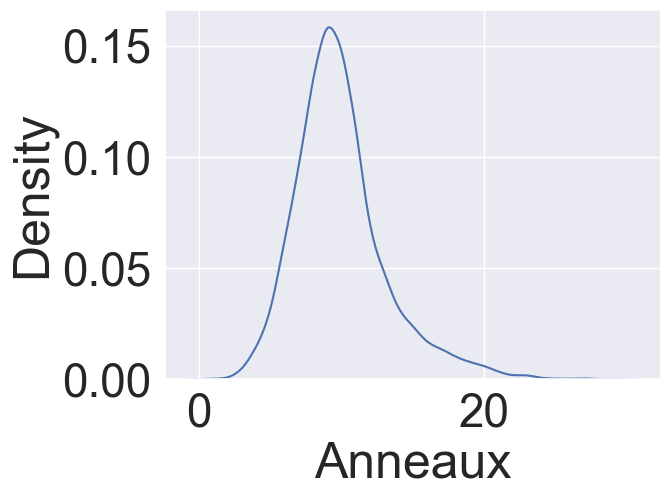

In [13]:
sns.kdeplot(abalone['Anneaux'])
plt.show()

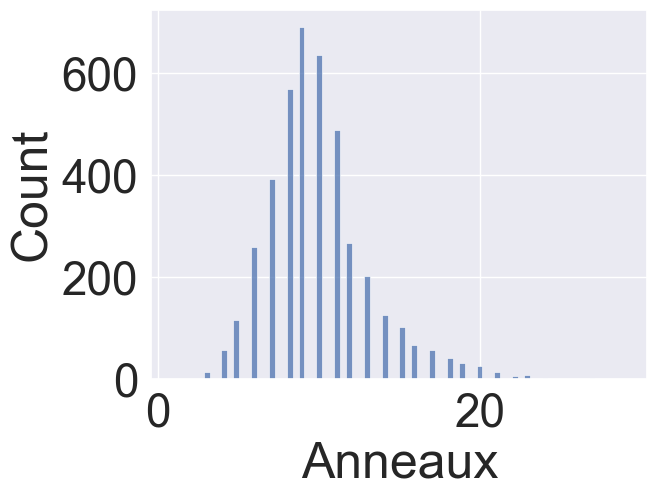

In [14]:
sns.histplot(abalone['Anneaux'])
plt.show()

<Figure size 1200x600 with 0 Axes>

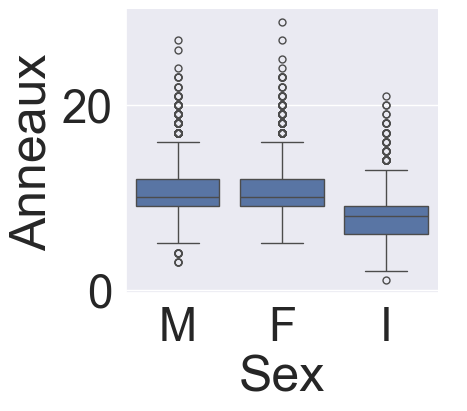

In [15]:
plt.figure(figsize=(12, 6))
sns.catplot(x='Sex', y='Anneaux', data=abalone, kind='box')
plt.show()

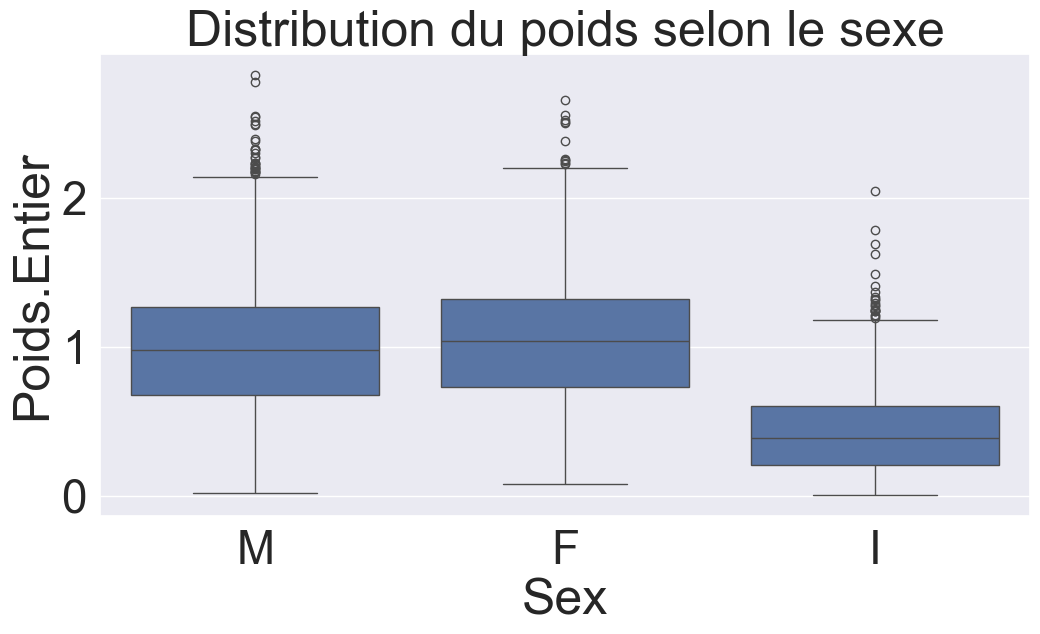

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=abalone, x='Sex', y='Poids.Entier')
plt.title('Distribution du poids selon le sexe')
plt.show()

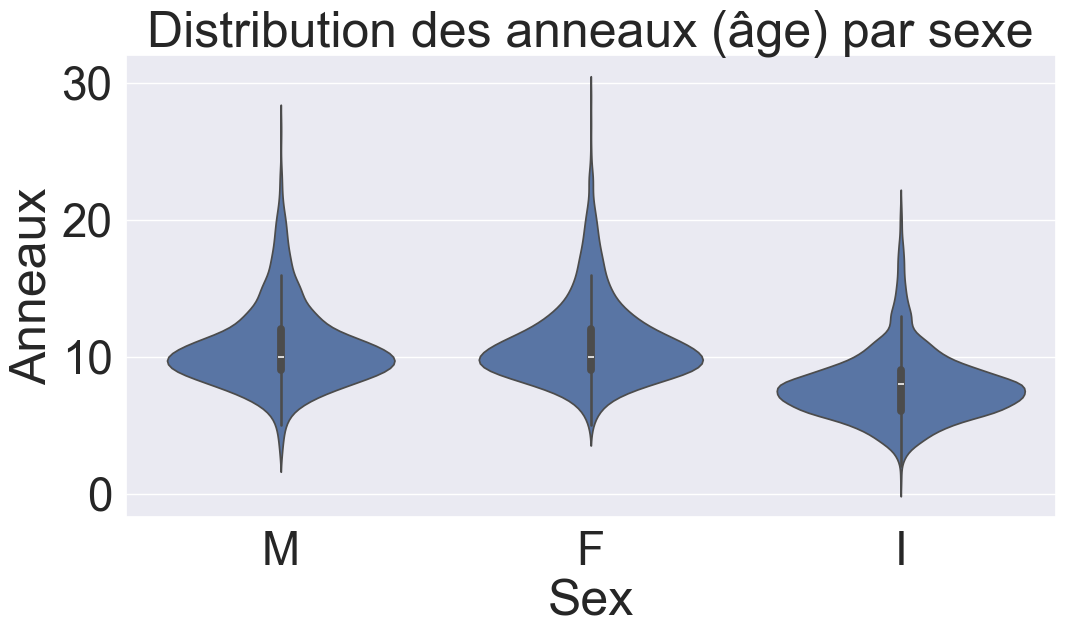

In [17]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=abalone, x='Sex', y='Anneaux')
plt.title('Distribution des anneaux (âge) par sexe')
plt.show()

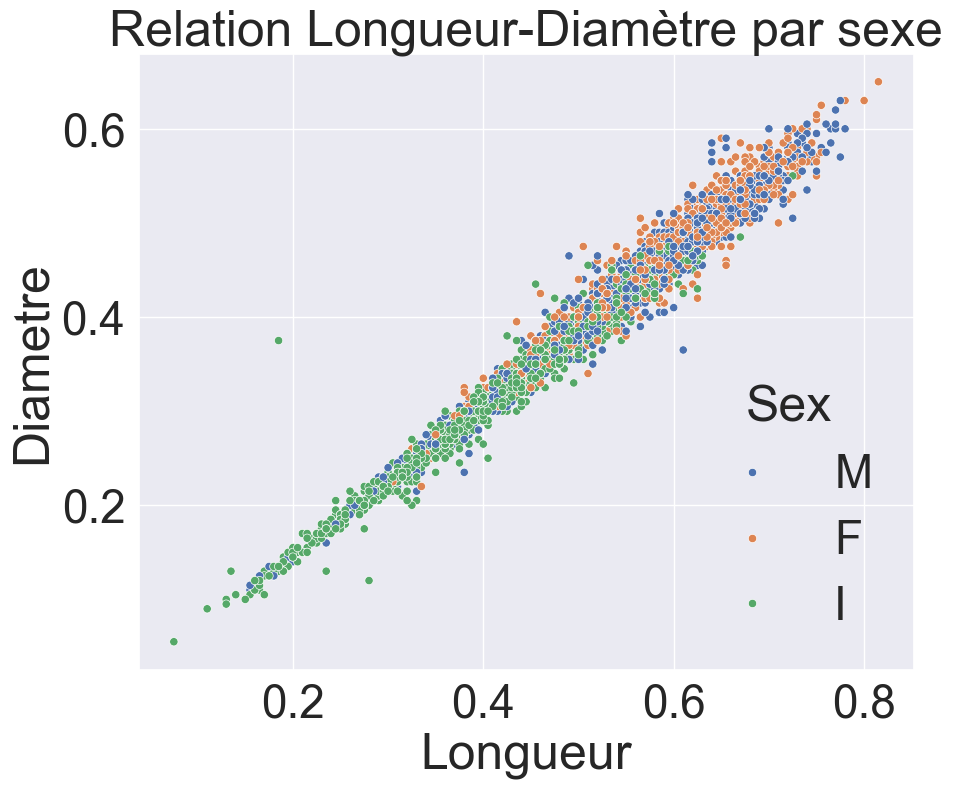

In [18]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=abalone, x='Longueur', y='Diametre', hue='Sex')
plt.title('Relation Longueur-Diamètre par sexe')
plt.show()

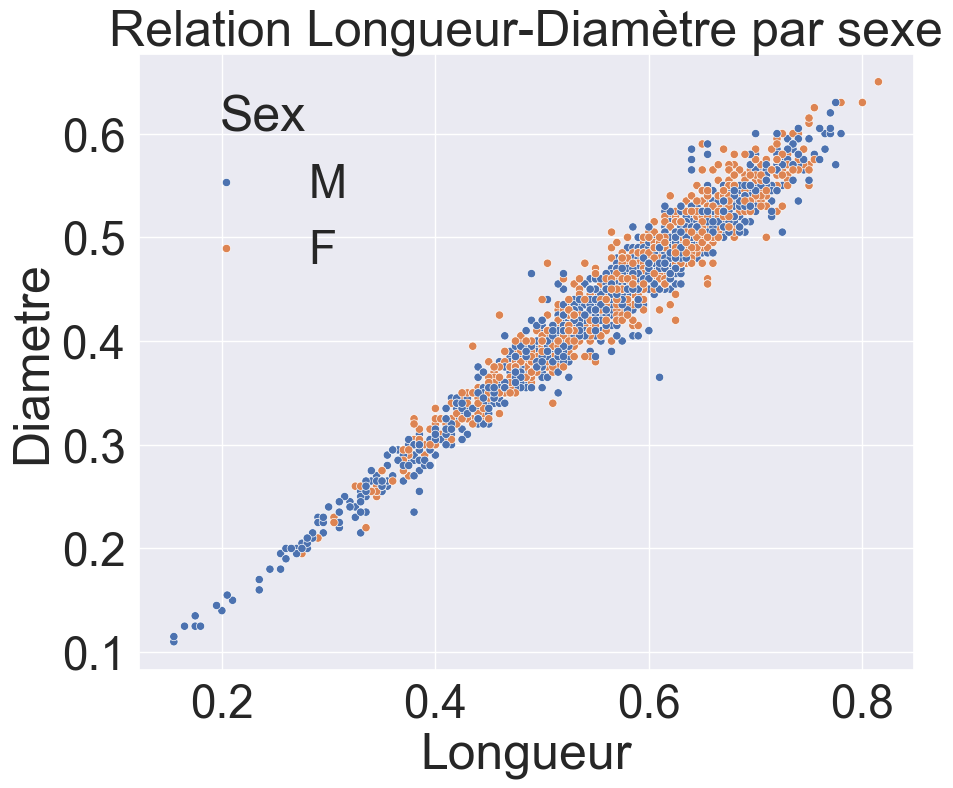

In [19]:
sexualized_abalone = abalone[abalone['Sex'].isin(['F', 'M'])]

plt.figure(figsize=(10, 8))
sns.scatterplot(data=sexualized_abalone, x='Longueur', y='Diametre', hue='Sex')
plt.title('Relation Longueur-Diamètre par sexe')
plt.show()

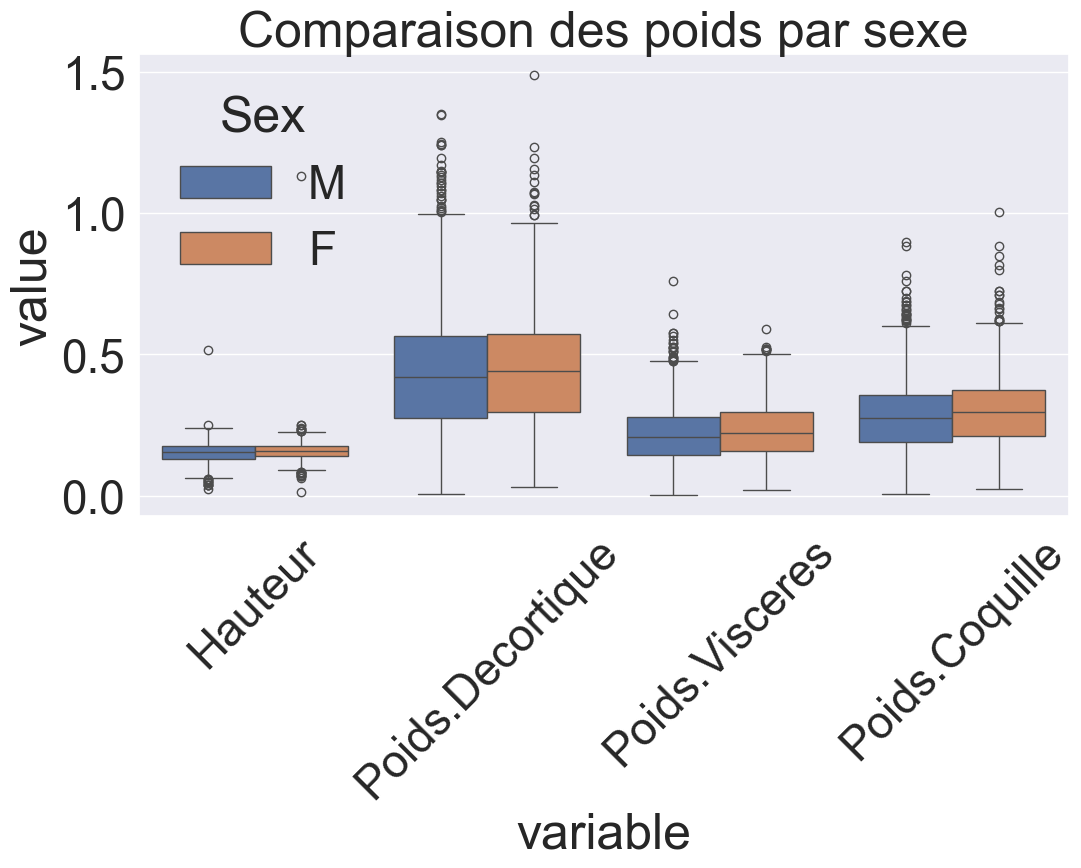

In [20]:
abalone_melted = sexualized_abalone.melt(id_vars=['Sex'], 
                    value_vars=['Hauteur', 'Poids.Decortique', 
                              'Poids.Visceres', 'Poids.Coquille'])
plt.figure(figsize=(12, 6))
sns.boxplot(data=abalone_melted, x='variable', y='value', hue='Sex')
plt.xticks(rotation=45)
plt.title('Comparaison des poids par sexe')
plt.show()

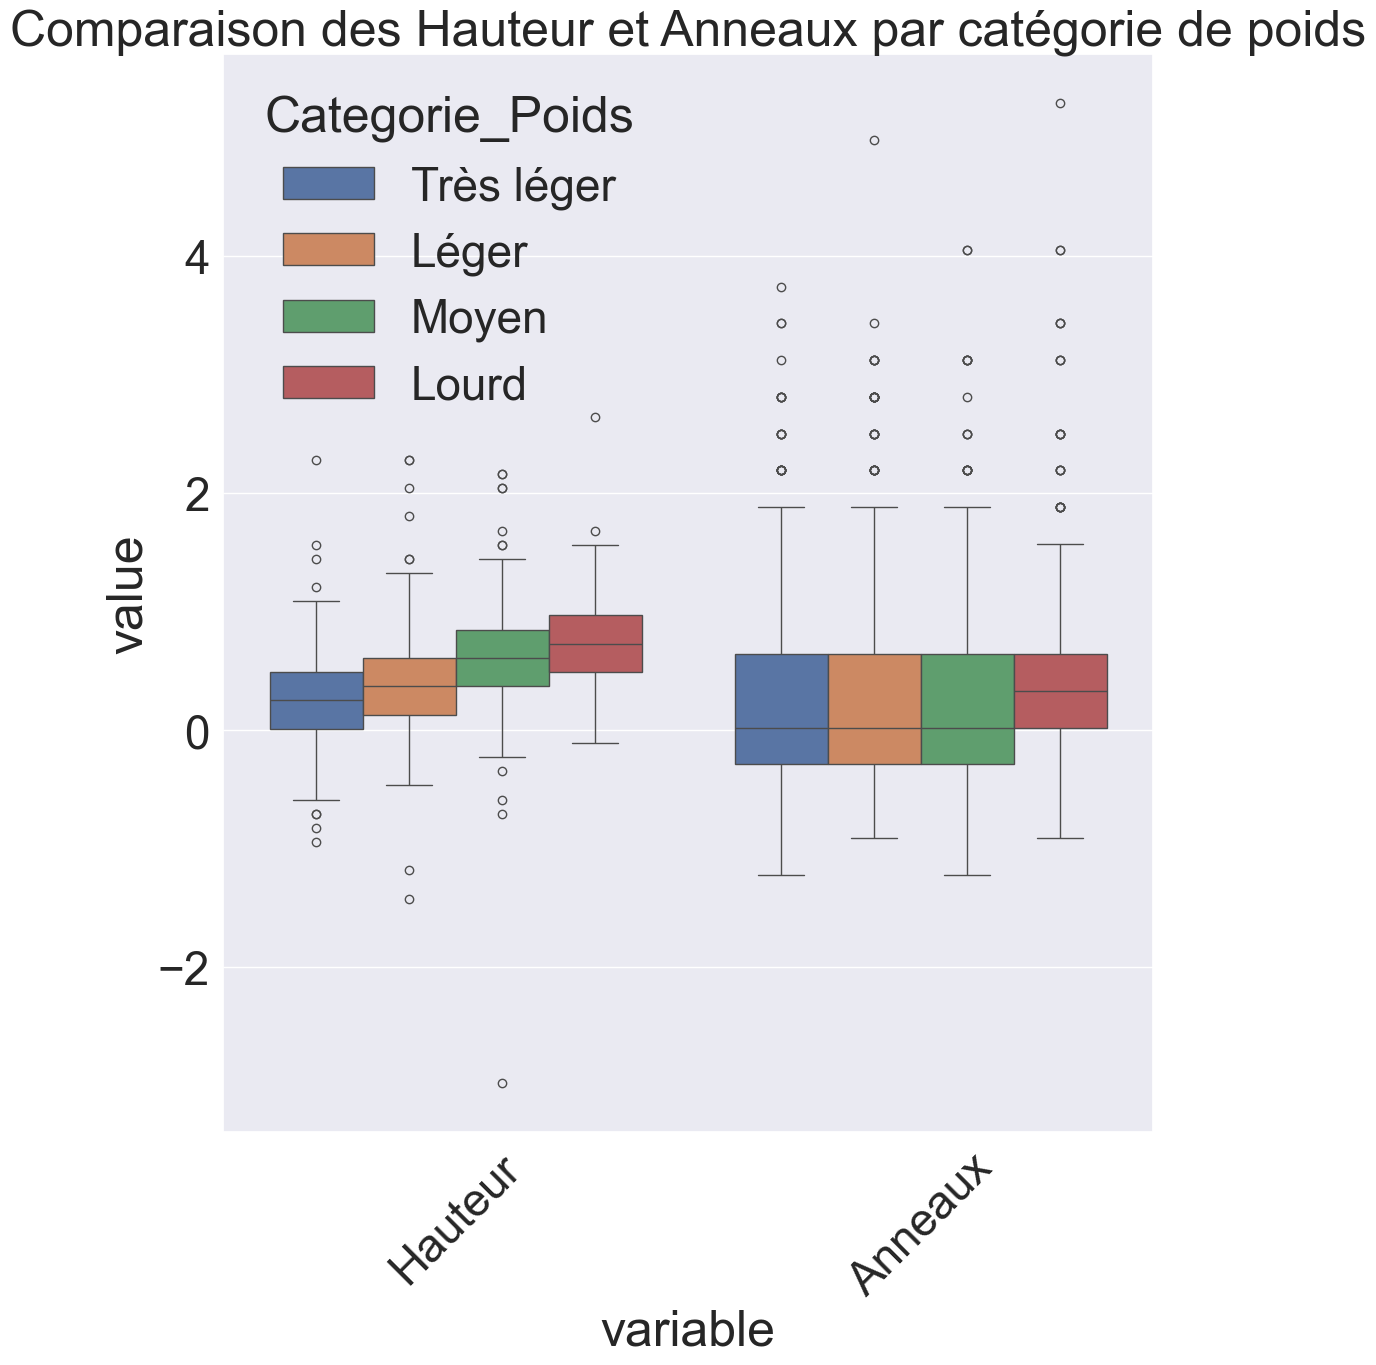

In [ ]:
reduced_abalone = centre_reduit_par_column(abalone, quantitatives)
bins = [0, 0.25, 0.5, 0.75, 1.0]
labels = ['Très léger', 'Léger', 'Moyen', 'Lourd']



reduced_abalone['Categorie_Poids'] = pd.cut(reduced_abalone['Poids.Entier'], 
                              bins=bins,
                              labels=labels,
                              include_lowest=True)



abalone_melted = reduced_abalone.melt(id_vars=['Categorie_Poids'], 
                    value_vars=['Hauteur', 'Anneaux'])




plt.figure(figsize=(12, 14))
sns.boxplot(data=abalone_melted, x='variable', y='value', hue='Categorie_Poids')
plt.xticks(rotation=45)
plt.title('Comparaison des Hauteur et Anneaux par catégorie de poids')
plt.show()